# Desafío Lunes Semana 3 - Gráficos

#### Gustavo Morales, G10 - 09.Sep.2019

### Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "qog_std_cs_jan18.csv"
df = pd.read_csv(fname)

In [3]:
random_seed = 382  # RUT ends in 038-2

In [4]:
df_sample = df[['undp_hdi',
                'ccodealp',
                'ht_region',
                'gle_cgdpc',
                'imf_pop',
                'ffp_hf',
                'wef_qes',
                'wdi_expedu',
                'wdi_ners']].dropna().sample(frac=0.5, random_state=random_seed)

In [5]:
df_sample['region'] = df_sample['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean']
)

**(R)** El objeto `Pandas` a utilizar en el siguiente ejercicio es:

In [6]:
df_sample;

### Ejercicio 2

Variables continuas: `undp_hdi`, `gle_cgdpc`, `imf_pop`, `ffp_hf`, `wef_qes`, `wdi_expedu`, `wdi_ners`.

Variables discretas: `ccodealp`, `region`.

Aunque `imf_pop` medida en cantidad de personas es técnicamente una medida discreta (no existen 1.2 personas), la voy a considerar continua; (1) por que está representada en "millones" (sí existen 1.2 millones de personas), y (2) porque es más útil discretizar la muestra por segmentos (bins) en un histograma, que contar la frecuencia de valores enteros.

**(R)** Las medidas descriptivas para las variables continuas son:

In [7]:
df_sample[['undp_hdi',
           'gle_cgdpc',
           'imf_pop',
           'ffp_hf',
           'wef_qes',
           'wdi_expedu',
           'wdi_ners']].describe()

,undp_hdi,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.787167,21659.006546,23.830643,4.369048,4.085913,4.932790,81.252179
std,0.130879,20219.794631,40.175753,2.031879,0.893385,1.563701,19.053327
min,0.438000,900.770020,0.350000,1.000000,2.538635,1.925660,27.239189
25%,0.742750,7751.427600,2.278750,2.650000,3.468162,3.753833,77.970201
50%,0.810500,15328.060000,6.262500,4.100000,3.911405,4.955090,87.368702
75%,0.891750,32307.691000,20.394000,6.000000,4.641426,5.683212,94.208254
max,0.948000,104049.440000,202.768997,8.600000,5.986858,8.627110,99.444328


Y para las frecuencias (no tiene mucho sentido hacerlo para `ccodealp` porque son valores únicos, pero ahí va):

In [8]:
df_sample['region'].value_counts()

WesternDem       11
EastEurope       10
LatAm             6
SubSaharian       6
NorthAfrica       4
SouthEastAsia     2
EastAsia          1
Caribbean         1
SouthAsia         1
Name: region, dtype: int64

In [9]:
df_sample['ccodealp'].value_counts()

CHL    1
ETH    1
TUR    1
CPV    1
PAN    1
FRA    1
MLT    1
JPN    1
BLZ    1
NOR    1
GBR    1
EST    1
THA    1
SVN    1
ROU    1
AUS    1
GEO    1
DNK    1
SWZ    1
MLI    1
LUX    1
LTU    1
LKA    1
MDA    1
NLD    1
KAZ    1
CYP    1
BRA    1
QAT    1
CHE    1
NZL    1
PER    1
LBN    1
MUS    1
HRV    1
ARG    1
FIN    1
RWA    1
ECU    1
SRB    1
LAO    1
LVA    1
Name: ccodealp, dtype: int64

### Comparación con compañeros: TODO

### Ejercicio 3

In [10]:
def get_na(dataframe, var, print_list=False):
    """Returns the quantity and fraction of the 'dataframe' where the input variable 'var' is NaN.
    If asked for, returns the 'dataframe' indices of such cases instead.
    """
    na_df = dataframe[var].isna()
    
    # here 'ascending' is set to False to not change the output ordering
    na_quantity = na_df.value_counts(ascending=False)
    na_fraction = na_df.value_counts('%', ascending=False)
    if print_list:
        return dataframe[dataframe[var].isna()][var]
    
    """
    I have no idea how to force value_counts() to not drop an index
    when one boolean frequency is zero, so I will cover all cases.
    I also do not remember how to select by non-integer index, so I had to
    turn off sorting above and select using iloc.
    """
    
    # if SOME values are NaN
    if len(na_quantity)>1 and print_list==False:
        return var, na_quantity.iloc[1], na_fraction.iloc[1]
    # if everything is NaN
    if len(na_quantity)==1 and na_df.value_counts().index[0]==True and print_list==False:
        return var, na_quantity.iloc[0], na_fraction.iloc[0]
    # if nothing is NaN
    if len(na_quantity)==1 and na_df.value_counts().index[0]==False and print_list==False:
        return var, 0 , 0

Para testear la función agrego:

In [11]:
df_sample['test']=np.nan

e imprimo:

In [12]:
get_na(df_sample, 'test')

('test', 42, 1.0)

In [13]:
get_na(df_sample, 'undp_hdi')

('undp_hdi', 0, 0)

Lo cual es correcto. Para analizar todas las variables del dataframe original `df`:

In [14]:
results = [ get_na(df, col) for col in df.columns.tolist() ]

In [15]:
variables = [ result[0] for result in results ]
fractions = [ result[2] for result in results ]

In [16]:
s1 = pd.Series(variables, name='variable')
s2 = pd.Series(fractions, name='na_fraction')

Las tres variables con un mayor porcentaje de casos perdidos son:

In [17]:
pd.concat([s1, s2], axis=1).sort_values(by='na_fraction', ascending=False).head(3)

,variable,na_fraction
1191,r_elf61,0.494845
181,dpi_dhondt,0.494845
816,iaep_ese,0.494845


Y para obtener las listas de países correspondientes:

In [18]:
def get_nation_list(dataframe, var):
    print(var)
    for l in dataframe[dataframe[var].isna()]['ccodealp'].tolist():
        print(l, end=' ')
    print('')
    print('---')

In [19]:
var_list = pd.concat([s1, s2], axis=1).sort_values(by='na_fraction', ascending=False).head(3)['variable']
for var in var_list:
    get_nation_list(df, var)

r_elf61
DZA AND AGO ATG AZE BHS BHR BGD ARM BRB BIH BWA BLZ SLB BRN BDI BLR KHM CPV COM HRV CYP CZE DMA GNQ ETH ERI EST FJI FRA DJI GEO GMB DEU KIR GRD GUY JAM KAZ KEN KGZ LSO LVA LIE LTU MWI MDV MLT MUS MCO MDA MNE MOZ NAM NRU VUT FSM MHL PLW PAK PNG GNB TLS QAT RUS RWA KNA LCA VCT SMR STP SRB SYC SGP SVK VNM SVN ZWE SSD SDN SUR SWZ TJK TON TTO ARE TKM TUV UGA UKR MKD TZA UZB WSM YEM ZMB 
---
dpi_dhondt
AND ATG AZE BHS BHR BGD ARM BRB BWA BLZ SLB BRN MMR CMR CAN CAF TCD CHN TWN COM COG CUB DMA ETH ERI FJI FRA GAB GEO GMB GHA KIR GRD GIN HTI IRN CIV JAM JOR KEN PRK KWT KGZ LAO LBN LBR LBY LIE MWI MYS MDV MLI MCO MNG MNE MAR NRU VUT NGA FSM MHL PLW PAK PNG QAT RWA KNA LCA VCT SMR STP SAU SRB SYC SGP VNM SOM ZWE SSD SDN SWZ THA TON TTO ARE TKM TUV UGA EGY GBR TZA USA UZB WSM YEM ZMB 
---
iaep_ese
ALB AND AGO ATG AUS BHS BHR BGD BRB BEL BTN BWA BLZ SLB BRN MMR KHM CAN CPV CHN CUB CZE DNK DMA ETH ERI EST FJI DEU KIR GRC GRD GUY HUN ISL IND IRQ ISR ITA JAM JPN JOR PRK KWT KGZ LAO LBN LSO LV

### Ejercicio 4

In [52]:
def plot_sample_histogram(dataframe, var, true_mean, sample_mean=False):
    dataframe_sample = dataframe.dropna().sample(frac=0.5, random_state=random_seed)
    mean_tot = dataframe[var].dropna().mean()
    stdd_tot = dataframe[var].dropna().std()
    mean_sam = dataframe_sample[var].mean()
    plt.hist(dataframe[var].dropna(), color='lightgrey')
    plt.axvline(mean_tot, lw=3, color='tomato', ls='-', label='true_mean')
    plt.axvspan(mean_tot-stdd_tot, mean_tot+stdd_tot, alpha=0.1, color='red', label=r'$\mu \pm \sigma$')
    if sample_mean:
        plt.axvline(mean_sam, lw=3, color='tomato', ls='--', label='sample_mean')
    plt.xlabel(var)
    plt.legend()
    plt.tight_layout()

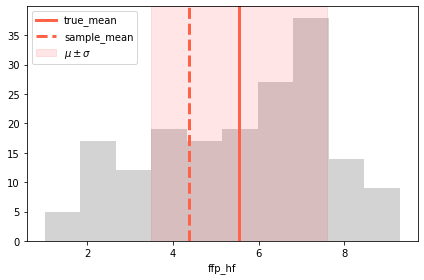

In [53]:
plot_histograms(df_sample, 'ffp_hf', True, sample_mean=True)

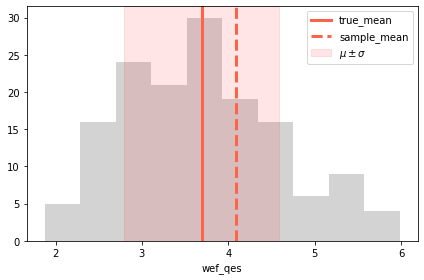

In [54]:
plot_histograms(df_sample, 'wef_qes', True, sample_mean=True)

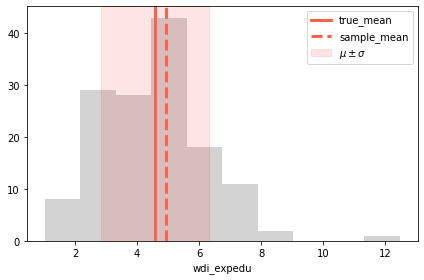

In [55]:
plot_histograms(df_sample, 'wdi_expedu', True, sample_mean=True)

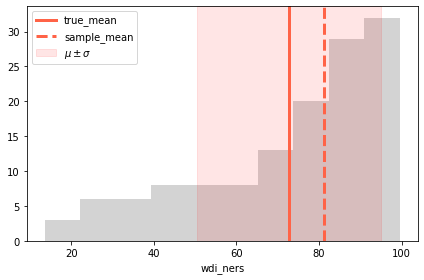

In [56]:
plot_histograms(df_sample, 'wdi_ners', True, sample_mean=True)

**(R)** Las variables en las que la media de la submuestra es mayor que las de la muestra completa son `wef_qes`, `wdi_expedu` y `wdi_ners`, pero hay que notar que todas caen dentro de *1-sigma* respecto de la media total.

### Ejercicio 5

In [25]:
pd.concat([s1, s2], axis=1).sort_values(by='na_fraction').head(4)

,variable,na_fraction
0,ccode,0.0
639,fh_pr,0.0
640,fh_rol,0.0
641,fh_status,0.0


Escogeré `fh_pr`, `fh_rol` y `fh_status`.

In [26]:
def plot_dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic='mean'):
    if statistic=='mean':
        stat = dataframe.groupby(plot_by)[plot_var].mean()
    if statistic=='median':
        stat = dataframe.groupby(plot_by)[plot_var].median()
    plt.plot(stat.values, stat.index.tolist(), 'o', label=plot_by)
    if global_stat:
        mean_tot = dataframe[plot_var].dropna().mean()
        plt.axvline(mean_tot, lw=2, color='tomato', ls='--', label='true_mean')
    plt.legend()
    plt.grid(axis='y')
    plt.xlabel(plot_var)
    plt.tight_layout()

In [27]:
df['region'] = df['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

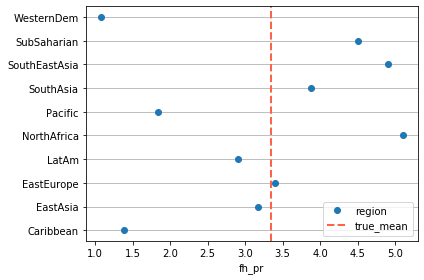

In [28]:
plot_dotplot(df, 'fh_pr', 'region', global_stat=True)

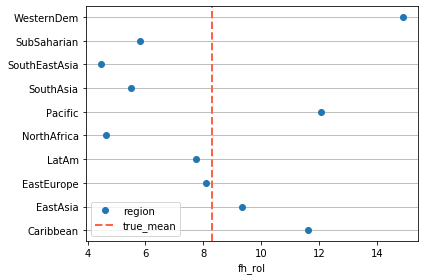

In [29]:
plot_dotplot(df, 'fh_rol', 'region', global_stat=True)

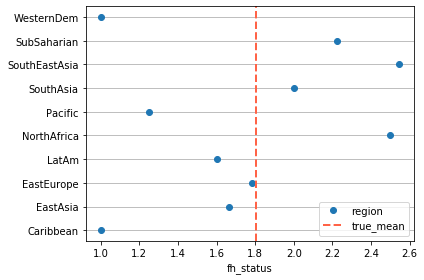

In [30]:
plot_dotplot(df, 'fh_status', 'region', global_stat=True)

### Ejercicio 6

In [31]:
df_sample = df_sample.drop(columns='test')

In [32]:
df_sample.to_csv('subsample_gmc_demo.csv')

##### ---